In [1]:
# filter some warning messages
import warnings
warnings.filterwarnings("ignore")

In [2]:
from myfunctions import *
from IcePlot import *

In [3]:
datapd = pd.read_csv('List_model.csv')

In [4]:
def plot_polynya_maps_from_polynya_data(datapd, p_ice, p_polynya, colors, typename='type_ice', titleonly=True, resotext=False, lighten =1, figsize=(6.5,7)):
    fig = plt.figure(figsize=figsize)
    n = 0
    color_dict = create_new_color_dict(colors, datapd, typename, lighten = lighten)
    for i in range(0, len(datapd)):
        name = datapd.at[i, 'source_id']
        t = datapd.at[i, typename]
        dsice = openpickle(name, p_ice)
        dspolynya = openpickle(name, p_polynya)
        pltx, plty = dsice.newlon, dsice.newlat
        plt_icemax = dsice.siconc.max('time')
        polynya_count = dspolynya.where(dspolynya>0).count('time')
        timelength = len(dspolynya.time)
        plt_polynya = polynya_count.where(polynya_count>0)/timelength
        n = n + 1
        if resotext:
            reso_text = str(datapd.at[i, 'resolution'])
        else:
            reso_text = None
        im, im2 = add_supplot_icepolynya(fig, n, name, color_dict[t], titleonly, reso_text, pltx,plty,plt_icemax,plt_polynya, timelength)
        gc.collect()
    add_cbars(fig, im, im2)
    add_type_color_legend(fig, list(color_dict.keys()),  list(color_dict.values()), 'sea ice module types')
    
    figsavename = 'polynya_maps.png'
    fig.savefig(figsavename, dpi = 300)

In [ ]:
p_ice = '../../SO_data/data_siconc_w_area/'
p_polynya = '../../SO_data/data_polynya_40/'
colors = ['#8dd3c7','#ffffb3','#bebada','#fb8072','#d9d9d9','#fdb462','#fccde5','#b3de69','#80b1d3','#bc80bd','#ccebc5']
plot_polynya_maps_from_polynya_data(datapd, p_ice, p_polynya, colors)

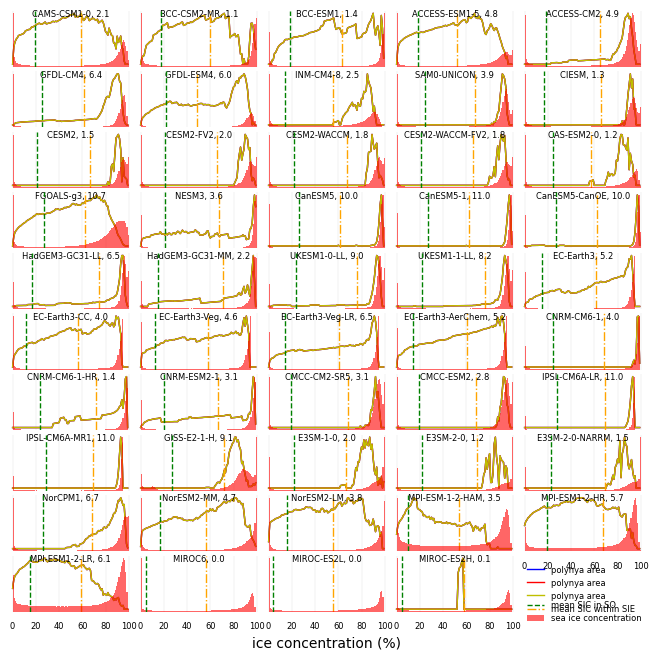

In [4]:
p_count = '../../SO_data/data_polynya_count/'
p_ice = '../../SO_data/data_siconc_w_area/'

plot_ice_hist(datapd, p_ice, p_count, 'PolynyaCounts.pdf', figsize=(6.5, 7))

In [8]:

fig = plt.figure(figsize=(6.5, 7))
n = 0
ice_thresholds = np.arange(0, 100, step=1)

for i in range(0, len(datapd)):
    name = datapd.at[i, 'source_id']
    if ispickleexists(name, p0) and ispickleexists(name, pice):
        n+=1
        ds = openpickle(name, p0)
        dssiconc = openpickle(name, pice)
        ice_mean = (dssiconc.siconc*dssiconc.areacello).sum()/dssiconc.areacello.where(dssiconc.siconc>=0).sum()            
        ice_mean_not0 = ((dssiconc.siconc.where(dssiconc.siconc>0)*dssiconc.areacello).sum((dssiconc.siconc.dims[-1],dssiconc.siconc.dims[-2]))/dssiconc.areacello.where(dssiconc.siconc>0).sum((dssiconc.siconc.dims[-1],dssiconc.siconc.dims[-2]))).mean()
 
        ax = fig.add_subplot(12, 5, n)
        plt.subplots_adjust(left=0.015,
                            bottom=0.045, 
                            right=0.985, 
                            top=0.99, 
                            wspace=0.08, 
                            hspace=0.08)
        
        pa = ax.plot(ice_thresholds[1:], ds[1:]/np.max(ds[1:]), linewidth = 1, 
                     color = 'b', label = 'polynya area')
        
        ax.set_ylim((-0.05, 1.05))
        ax.tick_params(labelsize = 6)
        
        titletext = "{}, {:.1f}".format(name, np.max(ds[1:])/1e12)
        ax.set_title(titletext, fontsize=6, y=1.0, pad=-4)
        # ax.text(5, 0.7, text_mean, fontsize = 6)
        
        ax.set_xlim((-1,101))
        ax.set_xticks([0,20,40,60,80,100])

        ax2 = ax.twinx()  # instantiate a second Axes that shares the same x-axis
        icevalues = dssiconc.siconc.values.flatten()
        icev = icevalues[icevalues>0]
        pb = ax2.hist(icev, bins=100, color = 'red', edgecolor=None,
                      alpha = 0.6, label = 'sea ice concentration')

        pc = ax2.axvline(x=ice_mean.values.item(), color = 'g', linestyle = '--',
                        linewidth=1, label = 'mean sea ice concentration')
        pe = ax.axvline(x=ice_mean_not0.values.item(), color = 'orange', linestyle = '-.',
                        linewidth=1, label = 'mean sea ice concentration (above 0)')


        if n<=52:
            ax.set_xticklabels([])            
        if n == 57:
            ax.set_xlabel('ice concentration (%)', fontsize=10)
            ax.xaxis.set_label_coords(1.6, -0.35)
            
        ax.set_yticklabels([])
        ax.set_frame_on(False)
        ax.tick_params(tick1On=False)
        ax2.set_yticklabels([])
        ax2.set_yticks([])
        ax2.set_frame_on(False)
        ax2.tick_params(tick1On=False)
        
        ax.xaxis.grid(True,'major', ls='-', lw=0.2, alpha = 0.6)
        if n == 57:
            l = ax.legend(fontsize = 8, frameon=False, loc='center left', bbox_to_anchor=(1.05, 0.4), ncol=2)
            l2 = ax2.legend(fontsize = 8, frameon=False, loc='center left', bbox_to_anchor=(1.05, 0), ncol=2)
        # break

# fig.savefig('Sup_PolynyaCounts.eps', format='eps')
fig.savefig('Sup_PolynyaCounts.pdf', format='pdf')

NameError: name 'p0' is not defined

<Figure size 650x700 with 0 Axes>

In [5]:
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)

In [6]:
# new color from https://colorbrewer2.org/
colors = ['#8dd3c7','#ffffb3','#bebada','#fb8072','#d9d9d9','#fdb462','#fccde5','#b3de69','#80b1d3','#bc80bd','#ccebc5']
# colors = cm.get_cmap("Set3").colors

def create_new_color_dict(colors, datapd, typename, lighten = 1):
    types = datapd[typename].unique()
    color_dict = {}
    if len(colors) >= len(types):
        print('create new color dict')
        for i in range(len(types)):
            color_dict[types[i]] = lighten_color(colors[i], lighten)
        return color_dict
    else:
        raise ValueError("More types than colors.")

In [7]:
def plot_maps_polynya(datapd, p_polynya, name2, p_ice, colors, circle, typename='type', titleonly = True, lighten=1, resotext = False, figname=None, figsize=(6.5, 7.5)):
    fig = plt.figure(figsize=figsize)
    n = 0
    color_dict = create_new_color_dict(colors, datapd, typename, lighten = lighten)
    
    for i in range(0, len(datapd)):
        name = datapd.at[i, 'source_id']
        if name2:
            path_polynya = p_polynya + name + '_' + name2 + '_*.pickle'
        else:
            path_polynya = p_polynya + name + '.pickle'
        newpath = glob.glob(path_polynya)[0]
        ds = pd.read_pickle(newpath)
        dsice = openpickle(name, p_ice)
        
        n = n + 1
        ax = fig.add_subplot(8, 8, n, projection=ccrs.SouthPolarStereo())
        plt.subplots_adjust(left=0.01,
                            bottom=0.01, 
                            right=0.99, 
                            top=0.99, 
                            wspace=0.04, 
                            hspace=0.04)
        bbox = ax.get_position()
        t = datapd.at[i, typename]
        if titleonly:
            rect = Rectangle((bbox.x0-0.002,bbox.y1+0.001),
                             bbox.width+0.004, 0.012, 
                             fill=True, color=color_dict[t], alpha=1, zorder=-1,
                             transform=fig.transFigure, clip_on=False)
        else:
            rect = Rectangle((bbox.x0-0.002367,bbox.y0),
                             bbox.width+0.004734,bbox.height+0.02, 
                             fill=True, color=color_dict[t], alpha=1, zorder=-1,
                             transform=fig.transFigure, clip_on=False)
        fig.add_artist(rect)

        ax.set_extent([-180, 180, -90, -50], ccrs.PlateCarree())
        
        plt_icemax = dsice.siconc.max('time')
        pltx = dsice.newlon
        plty = dsice.newlat
        ds_polynya = ds.count('time')
        plt_polynya = ds_polynya.where(ds_polynya>0)/len(ds.time)
            
        title = ax.set_title('{}'.format(name), 
                             fontsize=6, pad=-0.5)
        # title._bbox_patch._mutation_aspect = 1
        # title.get_bbox_patch().set_boxstyle("square", pad=11.9)
        ax.text(0,-90, str(len(ds.time)), fontsize=6, color='w', ha='center')
        if resotext:
            ax.text(180,-60, str(datapd.at[i, 'resolution']), fontsize=6, color='w', ha='center')

        ax.add_feature(cfeature.LAND, zorder=1, color = 'grey')
        ax.add_feature(cfeature.OCEAN, alpha = 0.15)
        ax.set_boundary(circle, transform=ax.transAxes)

        ax.spines['geo'].set_edgecolor(None)
        im = ax.pcolormesh(pltx, plty, plt_icemax, vmin = 0, vmax=100, 
                           transform=ccrs.PlateCarree(), cmap=cmocean.cm.ice)
        im2 = ax.pcolormesh(pltx, plty, plt_polynya, vmin = 0, vmax=0.2, 
                           transform=ccrs.PlateCarree(), cmap=plt.cm.plasma)
    
    cbar_ax1 = fig.add_axes([0.20, 0.07, 0.35, 0.01])
    cbar1 = fig.colorbar(im, cax=cbar_ax1, orientation='horizontal')
    cbar1.set_label('Sea ice concentration (%)', size=8, labelpad=-0.1)
    cbar1.ax.tick_params(labelsize=6, direction='in')
    cbar1.outline.set_visible(False)
    
    cbar_ax2 = fig.add_axes([0.62, 0.07, 0.35, 0.01])
    cbar2 = fig.colorbar(im2, cax=cbar_ax2, orientation='horizontal', extend='max')
    cbar2.set_label('Frequency of appearance', size=8, labelpad=-0.1)
    cbar2.ax.tick_params(labelsize=6, direction='in')
    cbar2.outline.set_visible(False)
    def to_percentage(x, pos):
        return f"{x * 100:.0f}%"
    
    cbar2.formatter = FuncFormatter(to_percentage)
    cbar2.update_ticks()

    if figname:
        figsavename = figname + '.png'
        fig.savefig(figsavename, dpi = 300)
    # fig.savefig('DeepConvection_Multi.eps', format='eps')  # too big (should be less than 5MB
    # fig.savefig('DeepConvection_Multi.pdf', format='pdf')  # too big (should be less than 5MB

create new color dict


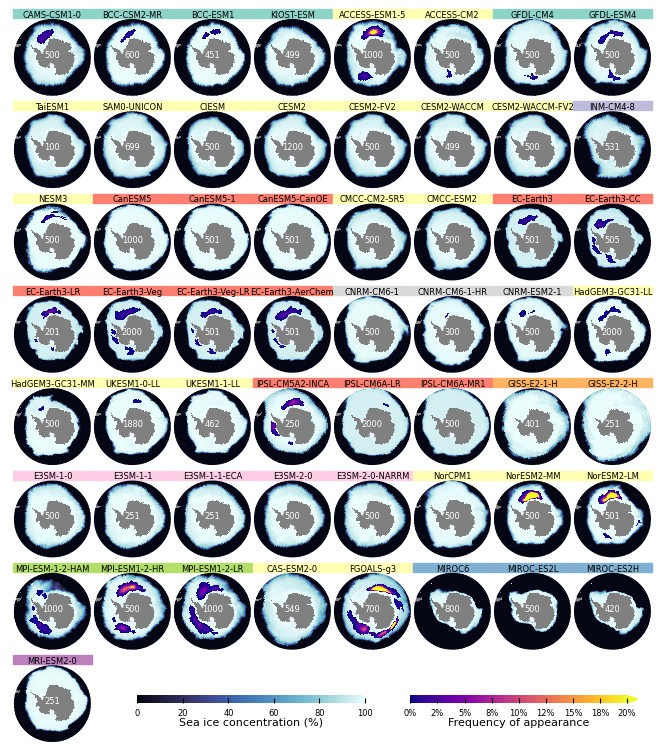

In [8]:
p_polynya = '../../SO_data/data_polynya/'
p_ice = '../../SO_data/data_siconc_w_area/'
name2 = None
typename = 'type_ice'

plot_maps_polynya(datapd, p_polynya, name2, p_ice, colors, circle, typename=typename, figname='multi_polynya_40')

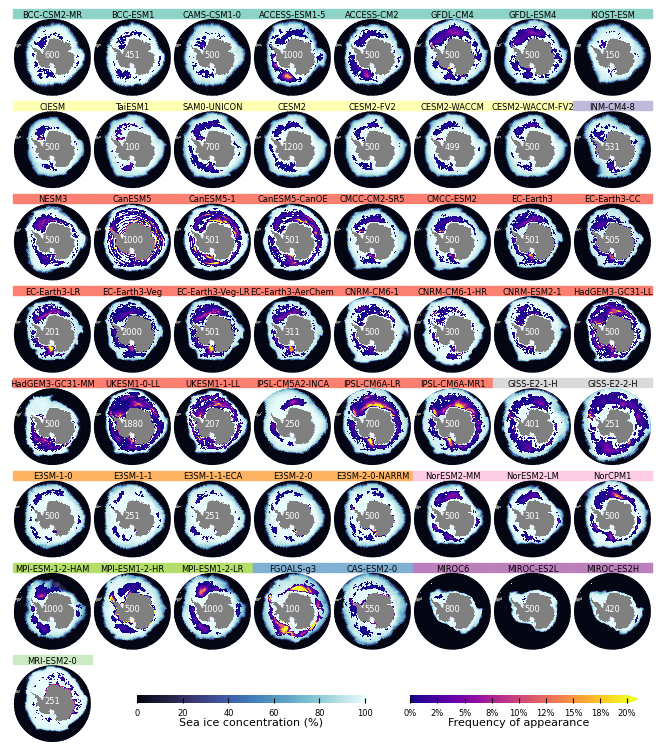

In [7]:
p_polynya = '../../SO_data/data_polynya_max_mean/'
p_ice = '../../SO_data/data_siconc_w_area/'
name2 = 'max'

plot_maps_polynya(datapd, p_polynya, name2, p_ice, color_dict, circle)

create new color dict


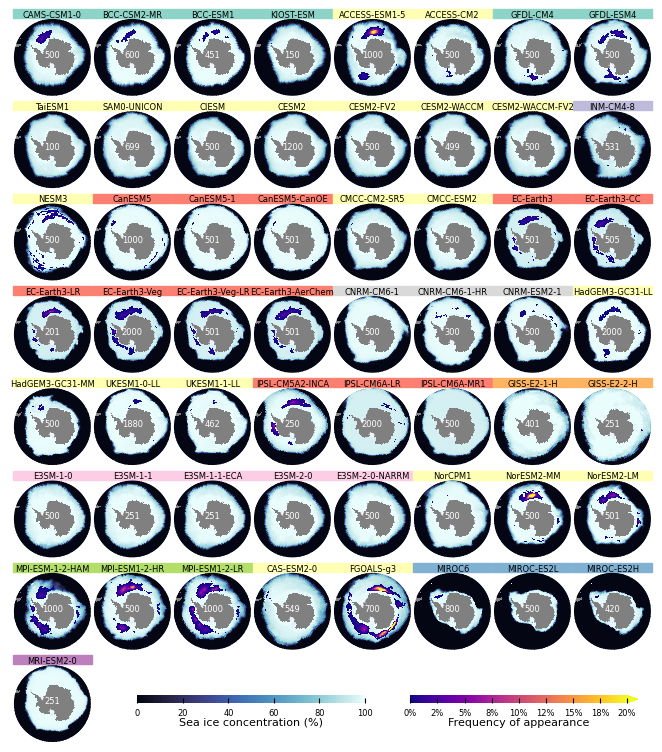

In [9]:
p_polynya = '../../SO_data/data_polynya_max_mean/'
p_ice = '../../SO_data/data_siconc_w_area/'
name2 = 'mean'

plot_maps_polynya(datapd, p_polynya, name2, p_ice, colors, circle, typename='type_ice', figname='multi_polynya_mean_ice')

create new color dict


KeyError: 'resolution'

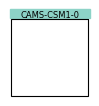

In [10]:
p_polynya = '../../SO_data/data_polynya_max_mean/'
p_ice = '../../SO_data/data_siconc_w_area/'
name2 = 'meannot0'
typename = 'type_ice'

plot_maps_polynya(datapd, p_polynya, name2, p_ice, colors, circle, typename=typename, resotext = True, figname='multi_polynya_meannot0')

create new color dict


NameError: name 'colorsys' is not defined

<Figure size 650x750 with 0 Axes>

In [ ]:
colors

In [11]:
def plot_multi_map(datapd, ice_threshold, title_threshold=False, figsize = (7, 8)):
    fig = plt.figure(figsize=figsize)
    
    n = 1

    for i in range(0, len(datapd)):
        name = datapd.at[i, 'source_id']
        dataname = name + '_'+ str(ice_threshold)
        if not ispickleexists(dataname, '../../SO_data/data_polynya/'):
            continue
        ds = openpickle(dataname, '../../SO_data/data_polynya/')
        ax = fig.add_subplot(8, 8, n, projection=ccrs.SouthPolarStereo())
        plt.subplots_adjust(
            left=0.01,
            bottom=0.01,
            right=0.99,
            top=0.99,
            wspace=0.04,
            hspace=0.04
        )
        ax.set_extent([-180, 180, -90, -50], ccrs.PlateCarree())
        if title_threshold:
            if ice_threshold == 'mean':
                title = str(round(ds.threshold.values.item())) + '%'
            else:
                title = str(ice_threshold) + '%'
            ax.text(0,-90, title, fontsize=6)
        ax.set_title(name, fontsize=6, pad=-0.5)
        pltx = ds.newlon
        plty = ds.newlat
        ice_max = ds.ice_max
        polynya_freq = ds.polynya_freq
        ax.plot([pltx[0,0], pltx[0,0]],[-90, -40], color = 'red', 
                transform=ccrs.PlateCarree(), linewidth = 1)
        


        im = ax.pcolormesh(pltx, plty, ice_max, 
                           transform=ccrs.PlateCarree(), 
                           vmin=0, vmax=100, 
                           cmap=cmocean.cm.ice)
        
        im2 = ax.pcolormesh(pltx, plty, polynya_freq, 
                            transform=ccrs.PlateCarree(), 
                            vmin = 0, vmax = 0.20, cmap=plt.cm.Spectral)
        ax.add_feature(cfeature.LAND, zorder=1)#, color='0.8')
        ax.add_feature(cfeature.COASTLINE, linewidth=0.2)
        ax.set_boundary(circle, transform=ax.transAxes)
        
        n = n+1       
        
    cbar_ax1 = fig.add_axes([0.65, 0.11, 0.30, 0.01])
    cbar1 = fig.colorbar(im, cax=cbar_ax1, orientation='horizontal')
    cbar1.set_label('Maximum sea ice coverage (%)', size=8, labelpad=-0.1)
    cbar1.ax.tick_params(labelsize=6,direction='in') 
    
    cbar_ax2 = fig.add_axes([0.65, 0.06, 0.30, 0.01])
    cbar2 = fig.colorbar(im2, cax=cbar_ax2, orientation='horizontal')
    cbar2.set_label('Frequency of appearance', size=8, labelpad=-0.1)
    cbar2.ax.tick_params(labelsize=6,direction='in')
    savename = 'Polynya_Multi' + '_' + str(ice_threshold) + '.png'
    fig.savefig(savename, dpi = 300)


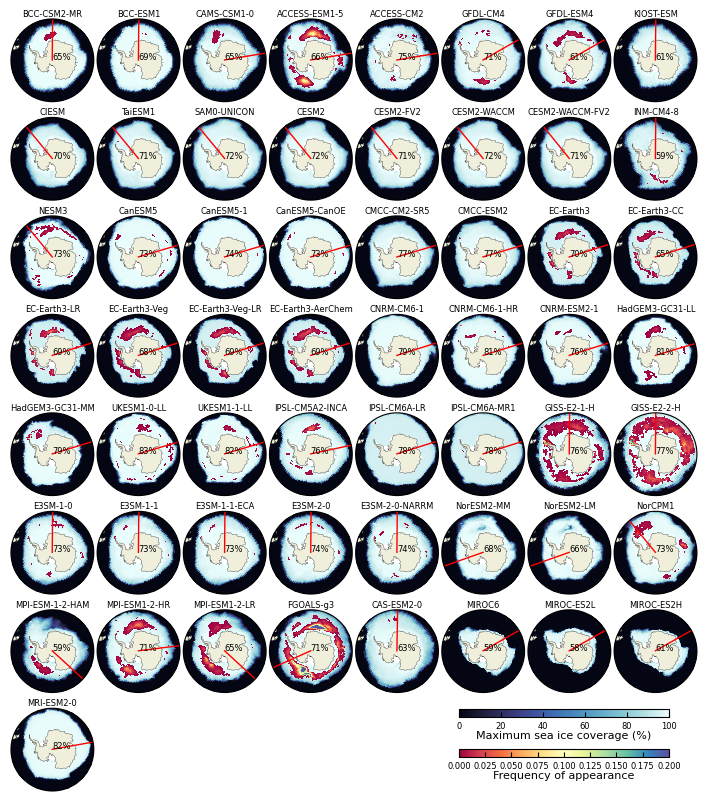

In [12]:
plot_multi_map(datapd, 'mean', title_threshold=True)

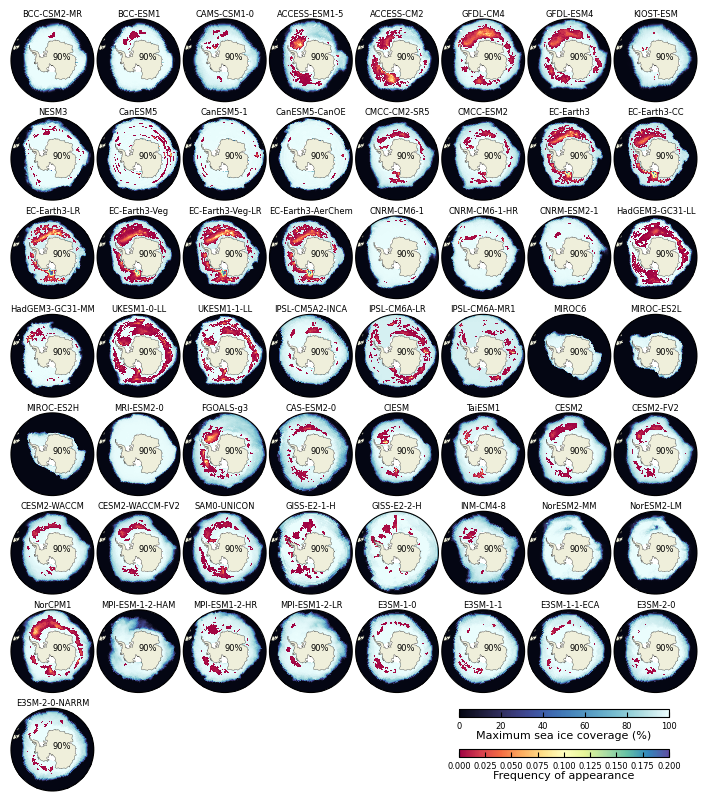

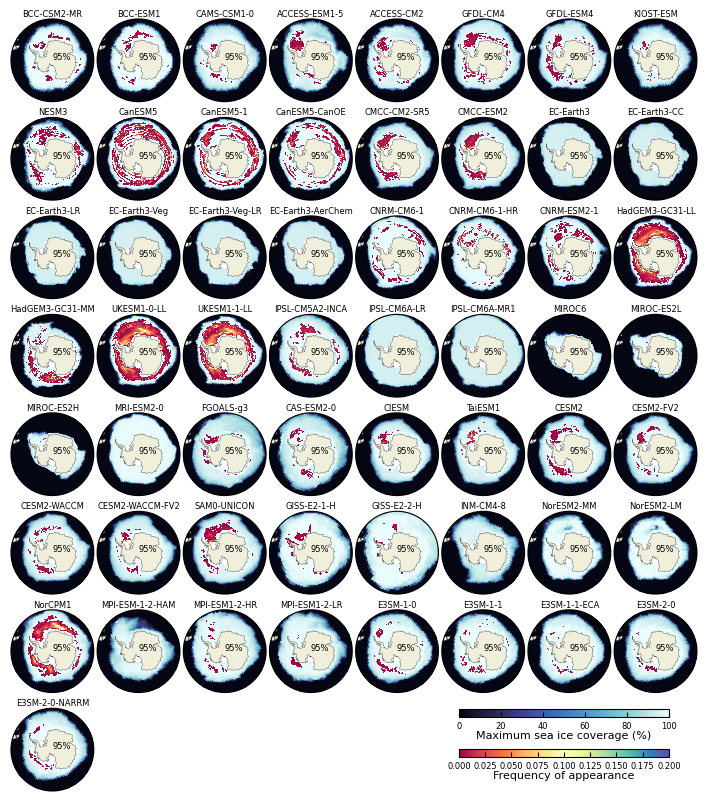

In [10]:
for ice_threshold in ice_thresholds:
    savename = 'Polynya_Multi' + '_' + str(ice_threshold) + '.png'
    if os.path.exists(savename):
        # print('    [o] {} exists.'.format(p))
        continue    
    plot_multi_map(datapd, ice_threshold, title_threshold=True)

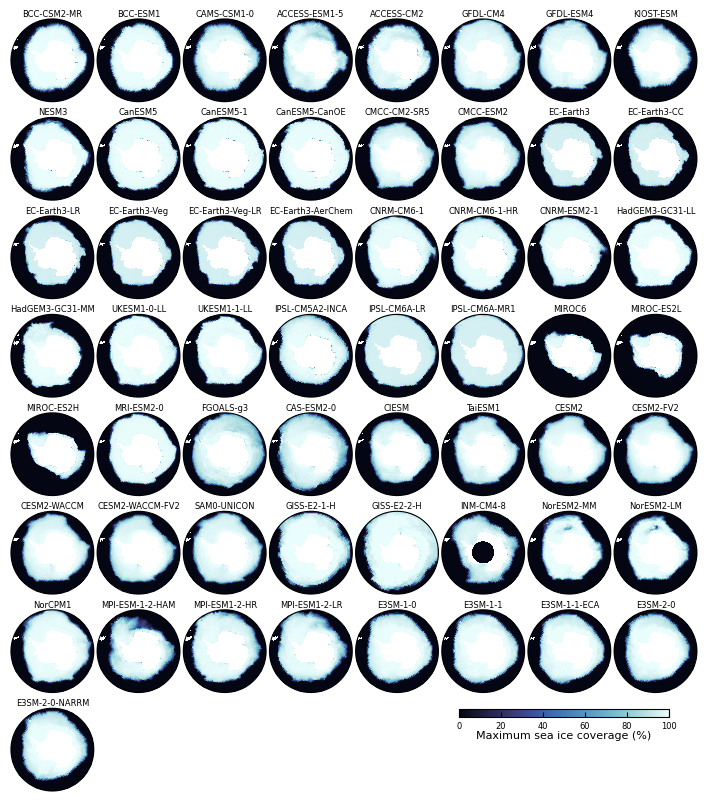

In [26]:
def plot_max_map(datapd, figsize = (7, 8)):
    fig = plt.figure(figsize=figsize)
    n = 1
    for i in range(0, len(datapd)):
        name = datapd.at[i, 'source_id']
        if not ispickleexists(name, 'data_siconc_w_area/'):
            continue
        ds = openpickle(name, 'data_siconc_w_area/')
        ax = fig.add_subplot(8, 8, n, projection=ccrs.SouthPolarStereo())
        plt.subplots_adjust(
            left=0.01,
            bottom=0.01,
            right=0.99,
            top=0.99,
            wspace=0.04,
            hspace=0.04
        )
        ax.set_extent([-180, 180, -90, -50], ccrs.PlateCarree())
    
        ax.set_title(name, fontsize=6, pad=-0.5)
        pltx = ds.newlon
        plty = ds.newlat
        ice_max = ds.siconc.max('time')
        
        im = ax.pcolormesh(pltx, plty, ice_max, 
                           transform=ccrs.PlateCarree(), 
                           vmin=0, vmax=100, 
                           cmap=cmocean.cm.ice)
        
        ax.set_boundary(circle, transform=ax.transAxes)
        
        n = n+1       
        
    cbar_ax1 = fig.add_axes([0.65, 0.11, 0.30, 0.01])
    cbar1 = fig.colorbar(im, cax=cbar_ax1, orientation='horizontal')
    cbar1.set_label('Maximum sea ice coverage (%)', size=8, labelpad=-0.1)
    cbar1.ax.tick_params(labelsize=6,direction='in')

plot_max_map(datapd)

In [94]:
ds = openpickle('FGOALS-g3', 'data_siconc_w_area/')

In [ ]:
def create_subplot(fig, n, tcolor, titleonly = True):
    ax = fig.add_subplot(8, 8, n, projection=ccrs.SouthPolarStereo())
    plt.subplots_adjust(left=0.01,
                            bottom=0.01, 
                            right=0.99, 
                            top=0.99, 
                            wspace=0.04, 
                            hspace=0.04)
    ax.set_extent([-180, 180, -90, -50], ccrs.PlateCarree())
    bbox = ax.get_position()
    if titleonly:
        rect = Rectangle((bbox.x0-0.002,bbox.y1+0.001),
                         bbox.width+0.004, 0.012, 
                         fill=True, color=tcolor, alpha=1, zorder=-1,
                         transform=fig.transFigure, clip_on=False)
    else:
        rect = Rectangle((bbox.x0-0.002367,bbox.y0),
                         bbox.width+0.004734,bbox.height+0.02, 
                         fill=True, color=tcolor, alpha=1, zorder=-1,
                         transform=fig.transFigure, clip_on=False)
    fig.add_artist(rect)
    
    return ax

def plot_data(ax, datainfo, ds, p_ice):
    name = datainfo['source_id']
    if p_ice:
        dsice = openpickle(name, p_ice)
        plt_icemax = dsice.siconc.max('time')
        pltx = dsice.newlon
        plty = dsice.newlat
        ds_polynya = ds.count('time')
        plt_data = ds_polynya.where(ds_polynya>0)/len(ds.time)
    else:
        pltx = ds.newlon
        plty = ds.newlat
        plt_data = 

def plot_maps_polynya(datapd, datapath, colors, circle, name2 = None, p_ice=None, typename='type', titleonly = True, lighten=1, resotext = False, figname=None, figsize=(6.5, 7.5)):
    fig = plt.figure(figsize=figsize)
    n = 0
    color_dict = create_new_color_dict(colors, datapd, typename, lighten = lighten)
    
    for i in range(0, len(datapd)):
        name = datapd.at[i, 'source_id']
        path_ds = datapath + name + '_' + name2 + '_*.pickle'
        newpath = glob.glob(path_ds)[0]
        ds = pd.read_pickle(newpath)
        
        
        n = n + 1
        ax = create_subplot(fig, n, color_dict[datapd.at[i, typename]], titleonly = tytleonly)
        plot_data(ax, ds)       
        title = ax.set_title('{}'.format(name), 
                             fontsize=6, pad=-0.5)
        
        
        
        
            
        
        # title._bbox_patch._mutation_aspect = 1
        # title.get_bbox_patch().set_boxstyle("square", pad=11.9)
        ax.text(0,-90, str(len(ds.time)), fontsize=6, color='w', ha='center')
        if resotext:
            ax.text(180,-60, str(datapd.at[i, 'resolution']), fontsize=6, color='w', ha='center')

        ax.add_feature(cfeature.LAND, zorder=1, color = 'grey')
        ax.add_feature(cfeature.OCEAN, alpha = 0.15)
        ax.set_boundary(circle, transform=ax.transAxes)

        ax.spines['geo'].set_edgecolor(None)
        im = ax.pcolormesh(pltx, plty, plt_icemax, vmin = 0, vmax=100, 
                           transform=ccrs.PlateCarree(), cmap=cmocean.cm.ice)
        im2 = ax.pcolormesh(pltx, plty, plt_polynya, vmin = 0, vmax=0.2, 
                           transform=ccrs.PlateCarree(), cmap=plt.cm.plasma)
    
    cbar_ax1 = fig.add_axes([0.20, 0.07, 0.35, 0.01])
    cbar1 = fig.colorbar(im, cax=cbar_ax1, orientation='horizontal')
    cbar1.set_label('Sea ice concentration (%)', size=8, labelpad=-0.1)
    cbar1.ax.tick_params(labelsize=6, direction='in')
    cbar1.outline.set_visible(False)
    
    cbar_ax2 = fig.add_axes([0.62, 0.07, 0.35, 0.01])
    cbar2 = fig.colorbar(im2, cax=cbar_ax2, orientation='horizontal', extend='max')
    cbar2.set_label('Frequency of appearance', size=8, labelpad=-0.1)
    cbar2.ax.tick_params(labelsize=6, direction='in')
    cbar2.outline.set_visible(False)
    def to_percentage(x, pos):
        return f"{x * 100:.0f}%"
    
    cbar2.formatter = FuncFormatter(to_percentage)
    cbar2.update_ticks()

    if figname:
        figsavename = figname + '.png'
        fig.savefig(figsavename, dpi = 300)
    # fig.savefig('DeepConvection_Multi.eps', format='eps')  # too big (should be less than 5MB
    # fig.savefig('DeepConvection_Multi.pdf', format='pdf')  # too big (should be less than 5MB

In [14]:
p_ice = '../../SO_data/data_siconc_w_area/'
p_mlotst = '../../SO_data/data_mlotst/'
p_mld = '../../SO_data/data_mld/'
for i in range(0, len(datapd)):
    name = datapd.at[i, 'source_id']
    dsice = openpickle(name, p_ice)
    if ispickleexists(name, p_mlotst):
        dsmld = openpickle(name, p_mlotst)
    else:
        dsmld = openpickle(name, p_mld)
    print("{} {}".format(i, name))
    print(dsice.time)
    print(dsmld.time)
    if (dsice.time != dsmld.time).any():
        print('F')
        break    

0 CAMS-CSM1-0
<xarray.DataArray 'time' (time: 500)> Size: 4kB
array([cftime.DatetimeNoLeap(2900, 9, 16, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(2901, 9, 16, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(2902, 9, 16, 0, 0, 0, 0, has_year_zero=True), ...,
       cftime.DatetimeNoLeap(3397, 9, 16, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(3398, 9, 16, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(3399, 9, 16, 0, 0, 0, 0, has_year_zero=True)],
      dtype=object)
Coordinates:
  * time     (time) object 4kB 2900-09-16 00:00:00 ... 3399-09-16 00:00:00
Attributes:
    axis:           T
    bounds:         time_bnds
    long_name:      time
    standard_name:  time
<xarray.DataArray 'time' (time: 500)> Size: 4kB
array([cftime.DatetimeNoLeap(2900, 9, 16, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(2901, 9, 16, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(2902, 9, 16, 0, 0, 0, 0, has_year